In [98]:
from scripts.utils import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression :)
In particular, linear regression is a useful tool for predicting a quantitative response. 
## Simple linear regression
Lives up to its name: It is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this linear relationship as $$Y \approx {\beta}_0 + {\beta}_1X $$ "$\approx$" might be read as "is approximately modeled as". It's used to refer to regressing $Y$ on $X$ (or $Y$ onto $X$).

In the equations $\beta_0$ and $\beta_1$ are two unknown constants that represents the intercept and slope terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters. With the training data, we can produce the estimates $\hat{\beta_0}$  and $\hat{\beta_1}$ for the model coefficients to predict future values.
$$\hat y \approx \hat{\beta}_0 + \hat{\beta}_1x $$
 Where $\hat y$ indicates a prediction of $Y$ on the basis of $X = x$. The hat symbol  $\hat {}$  , to denote the estimated value for an unknown parameter or coefficient, or the predicted value of the response.

Let's start by creating a fake dataset to understand the concept of linear regression. In this dataset, we have a single feature $X$ and a target $Y$. We will use the `numpy` library to create the dataset but the data will be created in such a way that it follows the linear relationship $Y = 2.5X + 5$ and the adding some noise to this function.

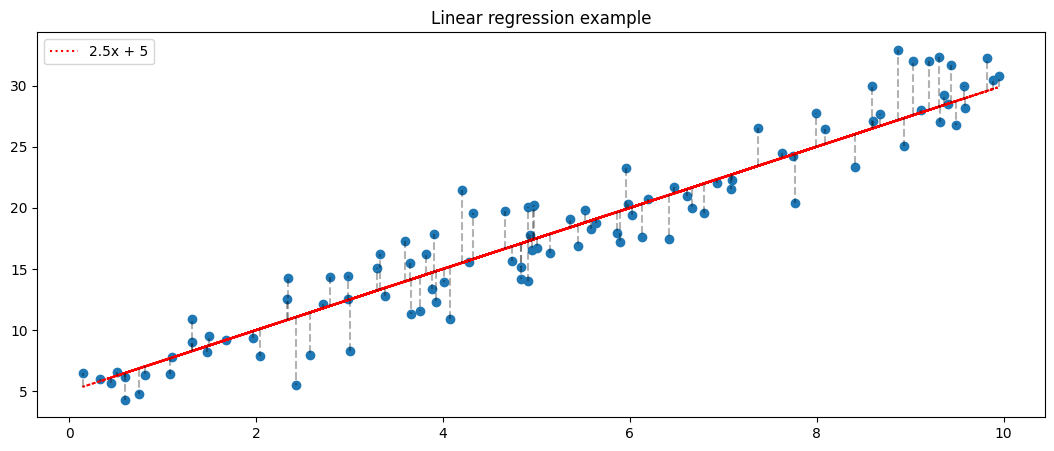

In [99]:
X = np.random.rand(100, 1) * 10 
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(100, 1) * 2  
y = true_slope * X + true_intercept + noise
lr = 2.5*X + 5

plt.figure(figsize = (13,5))
plt.scatter(X,y)
plt.plot(X,lr, c = 'red', label = '2.5x + 5', linestyle = ':')
plt.title('Linear regression example')
for i in range(len(X)):
    plt.plot([X[i],X[i]], [lr[i],y[i]], color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

In this case we know the real relationship between $X$ and $Y$ but in real-world problems, we don't know the relationship between the features and the target. We use linear regression to find this relationship.

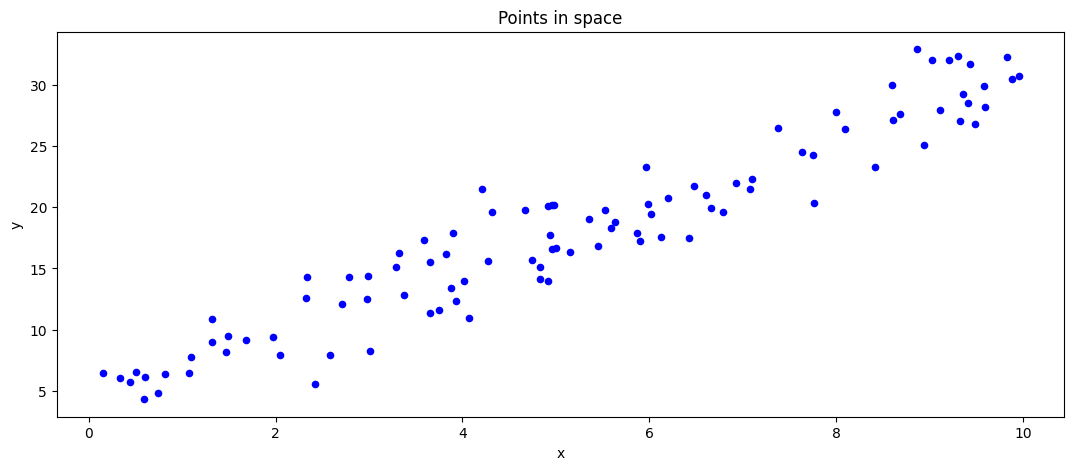

In [100]:
### Fake data

plt.figure(figsize = (13,5))
plt.scatter(X,y, color = 'blue', s = 20)
plt.title('Points in space')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Estimating Coefficients
In practice $\hat \beta_0$ and $\hat \beta_1$ are unknown. Before making predictions we need to estimate the coefficients. Let
$$(x_1,y_1), (x_2,y_2),...,(x_n,y_n)$$
represent $n$ observations pairs, each of which consists of measurements of $X$ and $Y$. Our goal is to obtain coefficient estimates  $\hat \beta_0$ and $\hat \beta_1$ such that the linear model fits the available data well, that is, so that  $y_i  \approx  \hat \beta_0 + \hat \beta_1 x_i$ for $i = 1,...,n$. In other words, we want to find an intercept and a slope such that the resulting line is as close as possible to the data points.
When measuring *closeness*, there's a number of ways to do it. 
####  Least squares
Let $y_i  \approx  \hat \beta_0 + \hat \beta_1 x_i$ be the prediction for Y based of the $i$th value of $X$. Then $e_i = y_i - \hat y_i$, represents the $i$th residual, this is the difference between the $i$th observed response value and the $i$th response value that is predicted by the model, in simpler words, the difference between the real value vs the predicted one for all the known values. This is defined as *residual sum of squares* (*RSS*)
$$\text{RSS} = e_1 + e_2 + ... + e_n$$
or...
$$\text{RSS} = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + ... + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$
The least squares approach chooses $\beta_0$ and $\beta_1$ to minimize the RSS, with calculus we can prove that the minimizers are 
$$\begin{gather*}
\hat\beta_1 = \frac{
\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}, \\
\hat \beta_0 = \bar{y} - \hat{\beta_1} \bar{x},
\end{gather*}$$
Where $\bar{y} ≡ \frac{1}{n}\sum_{i=1}^{n} y_i$ and  $\bar{x} ≡ \frac{1}{n}\sum_{i=1}^{n} x_i$ are the sample means.

#### How this process looks in linear algebra
For n observations, we can write the relationship between $X$ and $Y$ in matrix form as
$$\begin{array}{cc} \text{X} & \text{Weights} & \text{}  \text{}\\ \left[ \begin{array}{ccc}  1 & x_1 \\[0.3em] 1 & x_2 \\[0.3em] ... & ... \\[0.3em] 1 & x_n\end{array} \right] & \times \left[ \begin{array}{c} \beta_0 \\[0.3em] \beta_1 \end{array} \right]   & =  \left[ \begin{array}{c} \beta_0 + x_1 \beta_1 \\[0.3em] \beta_0 + x_2 \beta_1 \\[0.3em] ...  \\[0.3em] \beta_0 + x_n \beta_1\end{array} \right] \approx \left[ \begin{array}{c} y_1 \\[0.3em] y_2 \\[0.3em] ...  \\[0.3em] y_n \end{array} \right]  \end{array} $$

$$\text{X} \times \text{Weights} = \text{Predictions} \approx \text{Y}$$

With this, we can write the *RSS* as 

$$
\sum_{i=1}^{n} (y_i - \hat \beta_0 - \hat \beta_1 x_i)^2 =
\left( 
\begin{array}{c} 
\beta_0 + x_1 \beta_1 \\[0.3em] 
\beta_0 + x_2 \beta_1 \\[0.3em] 
\vdots \\[0.3em] 
\beta_0 + x_n \beta_1 
\end{array} 
- 
\begin{array}{c} 
y_1 \\[0.3em] 
y_2 \\[0.3em] 
\vdots \\[0.3em] 
y_n 
\end{array} 
\right)^2
$$

This meassure the difference between the predictions and the real values. The goal is to minimize this difference.

### Assessing accuracy of the coefficients

With the assumption that the *true* relation between $X$ and $Y$ relays on the form $Y = f(x) + \epsilon$ for some function $f$, where $\epsilon$ is a mean zero random error term. If $f$ is to be approximated by a linear function, then we write this relationship as $$Y = {\beta}_0 + {\beta}_1X + \epsilon$$
Here $\beta_0$ is the intercept term, that is, the expected value of $Y$ when $X = 0$, $\beta_1$ is the slope. the average increase in $Y$ associated with a one unit increase in $X$. The error term ($\epsilon$) is a catch for what we miss with this simple model: the true relationship is probably not linear, there may be other variables that cause variation in $Y$, and there may be measurement error. _We typically asume that the error term is independent of $X$_.

In resume, the linear regression model assumes that the relationship between $X$ and $Y$ is linear, that the errors $\epsilon$ are independent, and that they have constant variance.

Now the interesting part, let's implement the linear regression model from scratch using RSS as the loss function.

# Code implementation
The Coefficients object will create a tf.Variable with the shape of the number of features + 1 (for the bias term), the weights are initialized randomly between -1 and 1. This variable will be updated during the training process.
When calling the object, it will return the matrix multiplication of the features and the weights.

In [106]:
##### Building Blocks #####
class Coefficients(tf.Module):
    def __init__(self, n_dim):
        super().__init__(name=f'Coefficients')
        w_initializer = tf.keras.initializers.RandomUniform(minval=-1, maxval=1)
        self.n_dim = n_dim
        self.w = tf.Variable(w_initializer(shape=[n_dim + 1,1], dtype=tf.float32), trainable=True)
       
    def __repr__(self):
        return f'Values: {self.w.numpy()}'

    def __call__(self, x):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        #### Adding bias term ####
        x = tf.concat([tf.ones([x.shape[0],1], dtype= tf.float32),x], axis = -1)
        if self.n_dim + 1 != x.shape[-1]:
            raise ValueError(f'Expected input dimension: {self.n_dim}, got: {x.shape[-1]}')
        
        return x @ self.w

In [107]:
Coefficients(2)
### Since we are using 2 dimensions, we will have 3 coefficients, 2 for the features and 1 for the bias term

Values: [[ 0.5312605 ]
 [-0.06208396]
 [-0.28468847]]

### Loss function
The loss function is the RSS, it calculates the difference between the predictions and the real values, then squares the difference and sums all the values. The result is the loss value.
### Accuracy of the coefficients
$R^2$ statistic provides an alternative measure of fit. It takes the form of *proportion*- the proportion of variance explained - and so it always takes on a value between 0 and 1, and is independent of the scale of $Y$
To calculate $R^2$, we use the formula 
$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
where $\text{TSS} = \sum_{i=1}^{n}(y_i - \bar{y})^2$ is the *total sum of squares*. *TSS* measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, *RSS* measures the amount of variability that is left unexplained after performing the regression. Hence *TSS - RSS* measures the amount of variability in the response that is explained by performing the regression, and $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$ 
An $R^2$ that is close to 1 indicates that a large proportion of the variability in the response is explained by the regression. A number near 0 indicates that the regression does not explain much of the variability in the response; this might occur because the linear model is wrong, or the error variance $\sigma^2$ is high, or both.
### Gradient Descent
The gradient descent algorithm is used to minimize the loss function. It calculates the gradient of the loss function with respect to the weights and updates the weights in the opposite direction of the gradient. The learning rate is a hyperparameter that controls the step size of the update. If the learning rate is too high, the algorithm may not converge, and if it is too low, the algorithm may take a long time to converge.

In [108]:
##### Model #####
class LinearRegression(tf.keras.Model):
    def __init__(self, n_dim):
        super().__init__(name='LinearRegression')
        self.coeff = Coefficients(n_dim)
        
    def __call__(self, x):
        return self.coeff(x)
    
    def compile(self, optimizer, y_mean = 0):
        super(LinearRegression, self).compile()
        self.optimizer = optimizer
        self.y_mean = tf.convert_to_tensor(y_mean, dtype=tf.float32)
    
    #### Loss function
    def _RSS(self, y, y_hat):
        return tf.reduce_sum(tf.square(y - y_hat), axis = 0)[0]
    
    def _TSS(self, y_hat):
        return tf.reduce_sum(tf.square(y_hat - self.y_mean), axis = 0)[0]
    
    #### Accuracy metric
    def _Rsquared(self, RSS, TSS):
        return 1 - (RSS / TSS)
    
    def train_step(self, data):
        x, y = data 
        y = tf.convert_to_tensor(y, dtype=tf.float32)

        ### Forward pass
        with tf.GradientTape() as tape:
            y_hat = self(x)
            self.loss = self._RSS(y, y_hat)

        ### Metrics
        TSS = self._TSS(y_hat)
        self.accuracy = self._Rsquared(self.loss, TSS)
        
        ### Backward pass
        model_gradient = tape.gradient(self.loss, self.trainable_variables)

        try:
            self.optimizer.apply_gradients(zip(model_gradient, self.trainable_variables))
        except Exception as e:
            print(f"Error applying gradients: {e}")
            
        return {"Loss": self.loss, 'Accuracy': self.accuracy}

### Training
For the training process we will use the `tf.GradientTape` to calculate the gradients of the loss function with respect to the weights. Then we will update the weights using the gradients and the learning rate. We will repeat this process for a number of epochs. In each epoch, we will calculate the loss and the $R^2$ statistic.

In [109]:
# Creating instance of the model
lin_reg = LinearRegression(1)
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001) # Stochastic Gradient Descent
lin_reg.compile(optimizer= optimizer, y_mean = np.mean(y))

In [110]:
lin_reg.fit(X, y, epochs = 100, batch_size = 10, verbose = 0)

Tensor("concat:0", shape=(10, 2), dtype=float32) <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32>
Tensor("concat:0", shape=(10, 2), dtype=float32) <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32>


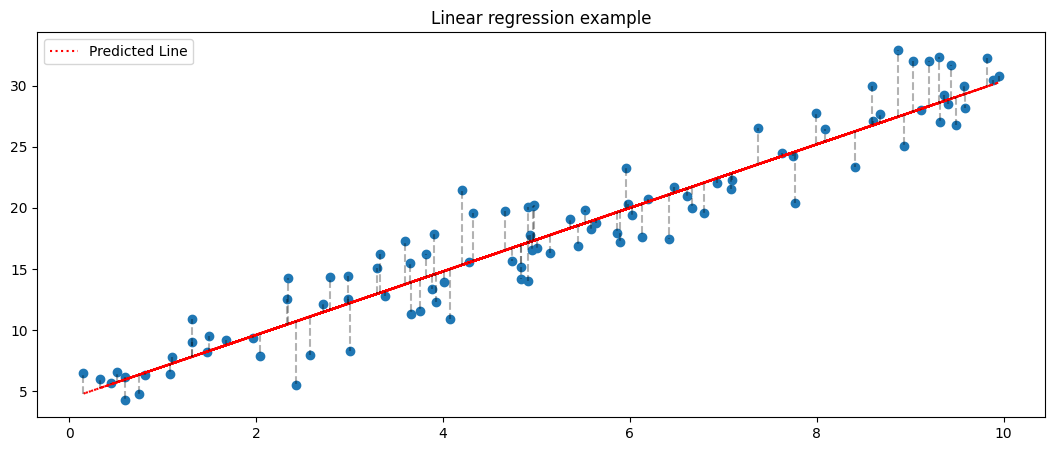

In [111]:
lr = lin_reg.trainable_variables[0][0].numpy() + X * lin_reg.trainable_variables[0][1].numpy()
plt.figure(figsize = (13,5))
plt.scatter(X,y)
plt.plot(X,lr, c = 'red', label = 'Predicted Line', linestyle = ':')
plt.title('Linear regression example')
for i in range(len(X)):
    plt.plot([X[i],X[i]], [lr[i],y[i]], color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# Multiple Linear Regression 
Simple linear regression is a useful approach for predicting a response on the basis of a single predictor variable. However in practice we often have more that one predictor. How can we extend our analysis of data in order to add additional predictors?
One option is to fit multiple separate linear regression models, but this leads to unclear predictions since each estimate is associated with a separate regression equation, second, each regression ignores the other ones in forming estimates for the coefficients.
Instead of fitting separate models, the optimal approach is to extend the simple linear model so that it can directly accomodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model. Supposing we have $p$ distinct predictors. Then the multiple linear regression model will take the form
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$
where $X_j$ represents the $j$th predictor and $\beta_j$ quantifies the association between that variable and the response.
We interprete $\beta_j$ as the average effect on $Y$ of a unit increase in $X_j$ 

### Estimating Coefficients
As the case in the simple linear regression, the regression coefficients $\beta_0,\beta_1,...\beta_p$ are unknown, and must be estimated. Given estimates $\hat{\beta_0}, \hat{\beta_1},...,\hat{\beta_p}$ we can make predictions using the formula.
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_p}x_p$$
The parameters are estimated using the same least squares approach than in the linear regression, the goal is to minimize the sum of squared residuals
$$\begin{gather}
\text{RSS} = \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 \\
= \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_1 - \hat{\beta_2}x_2 - ... - \hat{\beta_p}x_p)^2
\end{gather}$$

The values $\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_p}x_p$ that minimize are the multiple least squares regression coefficient estimates.

Let's fit a multiple linear regression model with sintetic data to understand the concept.

In [112]:
# Example data
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 10
Y = 3*X1 + 2*X2 + 7

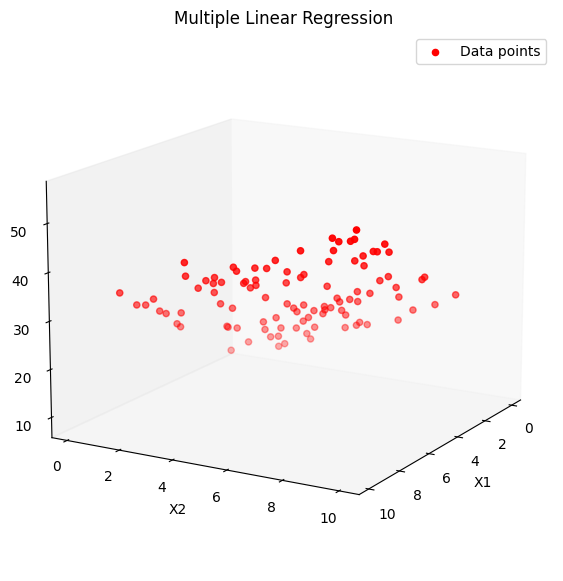

In [113]:
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15., azim=30)
ax.grid(False)

# Scatter plot of the data points
ax.scatter(X1, X2, Y, color='red', label='Data points') 

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')

plt.legend()
plt.show()


In [114]:
multiple_lin_reg = LinearRegression(2)    ### 2 features
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01) # Stochastic Gradient Descent
multiple_lin_reg.compile(optimizer= optimizer, y_mean = np.mean(Y))

In [118]:
X = np.array([X1, X2]).T
multiple_lin_reg.fit(X, Y, epochs = 200, batch_size = 25, verbose = 1)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - Loss: 9563.8301 - Accuracy: -2.0852
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - Loss: 4871.2925 - Accuracy: -0.8525
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - Loss: 4487.7669 - Accuracy: -0.3885
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - Loss: 7414.9042 - Accuracy: -1.5578
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - Loss: 3331.6708 - Accuracy: -0.1917
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - Loss: 3293.8669 - Accuracy: -0.1292
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - Loss: 10331.4228 - Accuracy: -2.3257
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - Loss: 4624.7360 - Accuracy: -0.4740
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - Loss: 5846.8916 - Accuracy: -0.8730
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - Loss: 6174.6521 - Accura

In [119]:
multiple_lin_reg.trainable_variables

[<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
 array([[6.344262 ],
        [2.0083928],
        [2.232236 ]], dtype=float32)>]

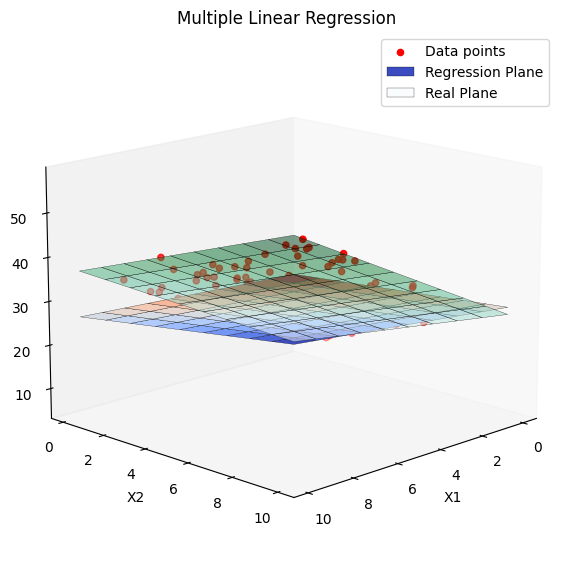

In [123]:
# Generate a grid of values
x1_range = np.linspace(X1.min(), X1.max(), 10)
x2_range = np.linspace(X2.min(), X2.max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = multiple_lin_reg.coeff.w[0] + multiple_lin_reg.coeff.w[1]*x1_grid + multiple_lin_reg.coeff.w[2]*x2_grid
y_real = 7 + 3*x1_grid + 2*x2_grid


fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15., azim=45)
ax.grid(False)

# Scatter plot of the data points
ax.scatter(X1, X2, Y, color='red', label='Data points') 


# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, cmap= plt.cm.coolwarm, label='Regression Plane', edgecolor='black', antialiased=True, linewidth=.2)
ax.plot_surface(x1_grid, x2_grid, y_real, cmap= plt.cm.BuGn, label='Real Plane', edgecolor='black', antialiased=True, linewidth=.2, alpha = 0.5)

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')

plt.legend()
plt.show()